# 1. Movimiento del péndulo con ángulos grandes
Los ángulos grandes que usaremos para este movimiento están fuera del rango de ángulos pequeños utilizados para la simulación teórica de "Péndulo con Ángulo Pequeño.ipynb".

In [1]:
#Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import pandas as pd
from analisis import anDatExp

## 1.1. Análisis de los Datos Experimentales

Análisis de los datos experimentales para los ***8 casos diferentes*** en los que varían:
- El ángulo inicial: 61.5°, 73° (Los valores varían entre sets de datos)
- La longitud de la cuerda: 1m, 2m
- La masa de la botella: 300g, 600g

------------------ Péndulo con 61.5° - 1m ------------------
Los valores tomados como máximos en el ciclo seleccionado son, respectivamente: [57.09 53.37]
El periodo del movimiento es de T=2.3 s
La gravedad del movimiento es de g=7.46 m / s2


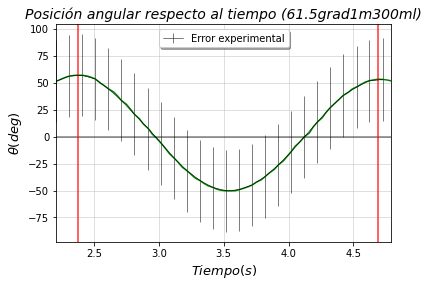

------------------ Péndulo con 61.5° - 1m ------------------
Los valores tomados como máximos en el ciclo seleccionado son, respectivamente: [52.35 45.2 ]
El periodo del movimiento es de T=2.2 s
La gravedad del movimiento es de g=8.16 m / s2


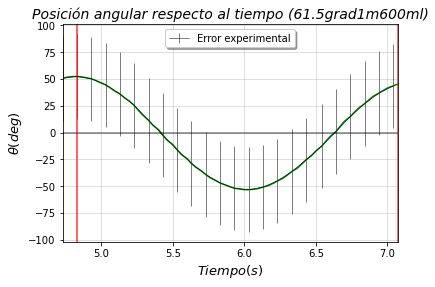

------------------ Péndulo con 73° - 1m ------------------
Los valores tomados como máximos en el ciclo seleccionado son, respectivamente: [61.   55.78]
El periodo del movimiento es de T=2.3 s
La gravedad del movimiento es de g=7.46 m / s2


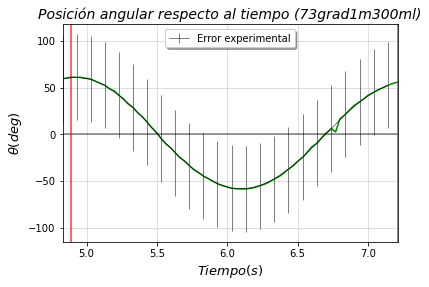

------------------ Péndulo con 73° - 1m ------------------
Los valores tomados como máximos en el ciclo seleccionado son, respectivamente: [69.93 61.9 ]
El periodo del movimiento es de T=2.4 s
La gravedad del movimiento es de g=6.85 m / s2


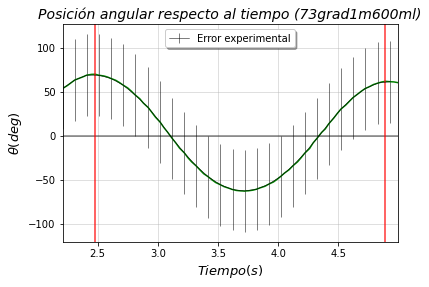

------------------ Péndulo con 61.5° - 2m ------------------
Los valores tomados como máximos en el ciclo seleccionado son, respectivamente: [61.58 59.34]
El periodo del movimiento es de T=2.5 s
La gravedad del movimiento es de g=12.63 m / s2


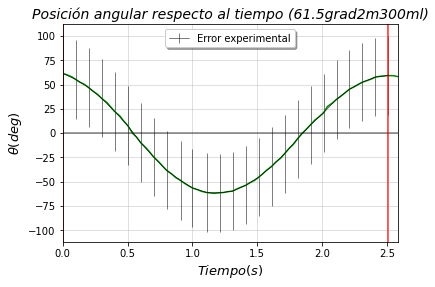

------------------ Péndulo con 61.5° - 2m ------------------
Los valores tomados como máximos en el ciclo seleccionado son, respectivamente: [62.14 59.68]
El periodo del movimiento es de T=2.6 s
La gravedad del movimiento es de g=11.68 m / s2


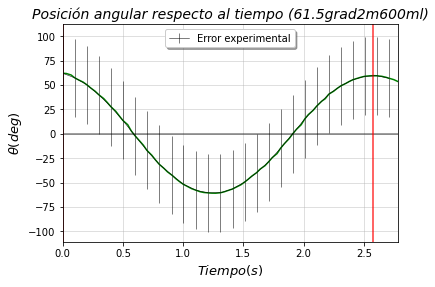

------------------ Péndulo con 73° - 2m ------------------
Los valores tomados como máximos en el ciclo seleccionado son, respectivamente: [70.22 63.34]
El periodo del movimiento es de T=2.6 s
La gravedad del movimiento es de g=11.68 m / s2


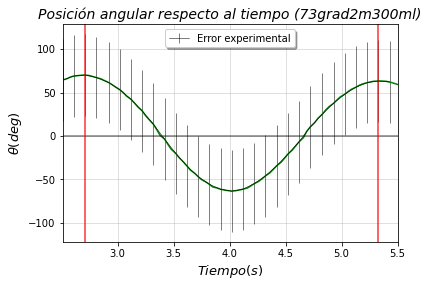

------------------ Péndulo con 73° - 2m ------------------
Los valores tomados como máximos en el ciclo seleccionado son, respectivamente: [64.9  58.75]
El periodo del movimiento es de T=2.7 s
La gravedad del movimiento es de g=10.83 m / s2


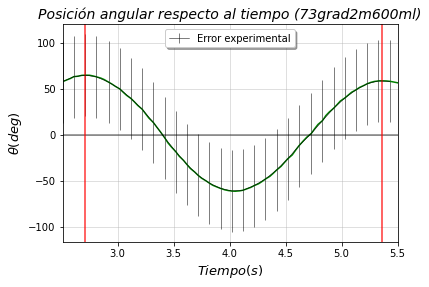

In [2]:
d61_5grad1m300ml = anDatExp("../Datos/Cuerda 1m/61,5grad_1m300ml/","_61.5grad1m300ml.csv", ((2.2,2.5),(4.5,4.8)))

d61_5grad1m600ml = anDatExp("../Datos/Cuerda 1m/61,5grad_1m600ml/","_61.5grad1m600ml.csv", ((4.7,5),(7,7.1)))

d73grad1m300ml = anDatExp("../Datos/Cuerda 1m/73grad_1m300ml/","_73grad1m300ml.csv", ((4.8,5),(7,8)))

d73grad1m600ml = anDatExp("../Datos/Cuerda 1m/73grad_1m600ml/","_73grad1m600ml.csv", ((2.2,2.6),(4,5)))

d61_5grad2m300ml = anDatExp("../Datos/Cuerda 2m/61.5grad2m300ml/","_61.5grad2m300ml.csv", ((0,0.5),(2.3,2.6)),sets=5)

d61_5grad2m600ml = anDatExp("../Datos/Cuerda 2m/61.5grad2m600ml/","_61.5grad2m600ml.csv", ((0,0.5),(2.5,2.8)),sets=5)

d73grad2m300ml = anDatExp("../Datos/Cuerda 2m/73grad_2m300ml/","_73grad2m300ml.csv", ((2.5,2.8),(5,5.5)),sets=5)

d73grad2m600ml = anDatExp("../Datos/Cuerda 2m/73grad_2m600ml/","_73grad2m600ml.csv", ((2.5,2.8),(5,5.5)), sets=5)

Finalmente hacemos un promedio de las gravedades para ingresarla como parámetro en la simulación y los periodos para compararlos con las simulaciones.

In [3]:
g = np.array([d61_5grad1m300ml.g.values[0], d61_5grad1m600ml.g.values[0], d73grad1m300ml.g.values[0],
              d73grad1m600ml.g.values[0], d61_5grad2m300ml.g.values[0], d61_5grad2m600ml.g.values[0],
              d73grad2m300ml.g.values[0], d73grad2m600ml.g.values[0]]).mean()

T1_61 = np.array([d61_5grad1m300ml.Per.values[0], d61_5grad1m600ml.Per.values[0]]).mean()
T1_73 = np.array([d73grad1m300ml.Per.values[0], d73grad1m600ml.Per.values[0]]).mean()
T2_61 = np.array([d61_5grad2m300ml.Per.values[0], d61_5grad2m600ml.Per.values[0]]).mean()
T2_73 = np.array([d73grad2m300ml.Per.values[0], d73grad2m600ml.Per.values[0]]).mean()

print("El promedio de la aceleración de gravedad en los datos experimentales es de: g=",
      round(g, ndigits=2)*u.m/u.s**2, sep="")
print("El primedio de los periodos T es de: \n",
      " 1m-61.5grad=", round(T1_61, ndigits=1)*u.s, "\n",
      " 1m-73grad=", round(T1_73, ndigits=1)*u.s, "\n",
      " 2m-61.5grad=", round(T2_61, ndigits=1)*u.s, "\n",
      " 2m-73grad=", round(T2_73, ndigits=1)*u.s, "\n", sep="")

El promedio de la aceleración de gravedad en los datos experimentales es de: g=9.59 m / s2
El primedio de los periodos T es de: 
 1m-61.5grad=2.2 s
 1m-73grad=2.3 s
 2m-61.5grad=2.6 s
 2m-73grad=2.7 s



## 1.2. Simulación Teórica

### 1.2.1 Definición de la función (para cualquier ángulo inicial)

In [4]:
def simTeoGra (lon, ang, T, gra=9.8, per=1):
    
    """
    Esta función genera una simulación teórica del movimiento de un
    pendulo ingresandole algunos parámetros iniciales. El único valor
    que requiere de unidades es el ángulo inicial (ang).
    
    Params:
    lon:
        Entero. Longitud de la cuerda.
    ang:
        Flotante. Ángulo inicial del movimiento. Debe estar en unidades
        angulares.
    T:
        Flotante. Es el valor del periodo extraido de los datos del
        movimiento experimental.
    gra:
        Flotante. Aceleración de gravedad. Por defecto se usa 9.8,
        pues es el estándar para la tierra.
    per:
        Entero. Los ciclos o "vueltas" que se quiere simular. Cabe resaltar
        que los datos varían significativamente entre ciclos, además, como
        el periodo lo extraemos de los datos, puede que este no sea el
        valor real del periodo teórico, por ende puede que lo que se
        muestre no sea exactamente "per" periodos. Por defecto: 1.
    
    Returns:
    datos:
        El DataFrame con los valores de tiempo, ángulo, velocidad y
        aceleración en cada instante de tiempo.
    Además, se imprime el valor de la amplitud y se muestran las gráficas de
    posición angular, velocidad angular y aceleración angular en función del 
    tiempo.
    """
    
    print("-"*18, "Péndulo con "+str(ang.value)+"° - "+str(lon)+"m "+"-"*18)
    #Parámetros iniciales
    w = 0
    theta = ang.to("rad").value
    print("La amplitud del movimiento es de:", np.round(theta, decimals=3)*u.rad)
    a = (-gra*np.sin(theta)/lon)
    
    #El cambio del tiempo
    dt = 0.01
    t = np.arange(0, (T*per), dt)
    
    #El DF donde se alojarán los datos
    datos = pd.DataFrame(np.array([t[0], theta, w, a]).reshape(1,4), columns=["t", "theta", "w", "a"])
    
    #Hacemos un ciclo para cada instante de tiempo usando las fórmulas dadas en el documento y alojamos
    #esos datos en una DF fila para ingresar esos valores en el DF datos
    for i in t[1:]:
        theta_ = theta+(w*dt)+(a*((dt**2)/2))
        w_ = w+(a*dt)
        a_ = (-gra*np.sin(theta_)/lon)
        fila = pd.DataFrame(np.array([i, theta_, w_, a_]).reshape(1,4), columns=["t", "theta", "w", "a"])
        datos = datos.append(fila, ignore_index=True)
        theta = theta_
        w = w_
        a = a_
    
    #Iniciamos la generación de los gráficos
    #Primero la posición angular
    plt.plot(t, datos.theta, color="purple")
    plt.xlabel(r"$Tiempo(s)$", size=13)
    plt.ylabel(r"$\theta(rad)$", size=13)
    plt.axhline(0, color="k", alpha=0.5)
    plt.xlim([0,t[-1]])
    plt.title("Posición angular respecto al tiempo ("+str(ang.value)+"° - "+str(lon)+"m)", size=14, fontstyle="oblique")
    plt.grid(alpha=0.5)
    plt.show()
    
    #Ahora velocidad angular
    plt.plot(t, datos.w, color="purple")
    plt.xlabel(r"$Tiempo(s)$", size=13)
    plt.ylabel(r"$\omega(\frac{rad}{s})$", size=13)
    plt.axhline(0, color="k", alpha=0.5)
    plt.xlim([0,t[-1]])
    plt.title("Velocidad angular respecto al tiempo ("+str(ang.value)+"° - "+str(lon)+"m)", size=14, fontstyle="oblique")
    plt.grid(alpha=0.5)
    plt.show()
    
    #Por último, aceleración angular
    plt.plot(t, datos.a, color="purple")
    plt.xlabel(r"$Tiempo(s)$", size=13)
    plt.ylabel(r"$\alpha(\frac{rad}{s^2})$", size=13)
    plt.axhline(0, color="k", alpha=0.5)
    plt.xlim([0,t[-1]])
    plt.title("Aceleración angular respecto al tiempo ("+str(ang.value)+"° - "+str(lon)+"m)", size=14, fontstyle="oblique")
    plt.grid(alpha=0.5)
    plt.show()
    
    #Regrasamos el DF con todos los datos
    return datos

### 1.2.2. Simulación teórica utilizando los valores extraidos de los datos

La simulación teórica con la aceleración de gravedad hallada en el análisis de los datos. Se simula para los ***4 casos diferentes*** en los que varían:
- El ángulo inicial: 61.5°, 73° (Los valores varían entre sets de datos)
- La longitud de la cuerda: 1m, 2m  

Se omite la masa (a diferencia de en el análisis de datos), ya que teóricamente no inflye en el movimiento

------------------ Péndulo con 61.5° - 1m ------------------
La amplitud del movimiento es de: 1.073 rad


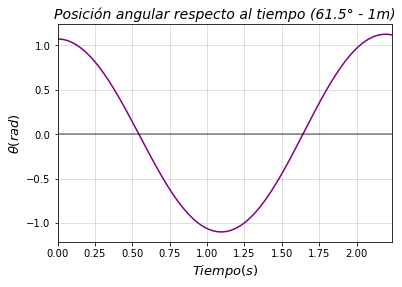

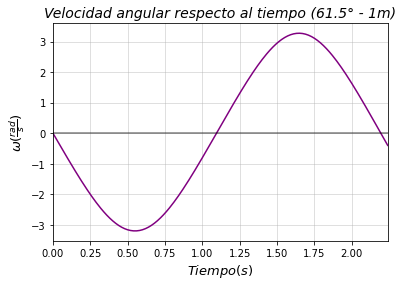

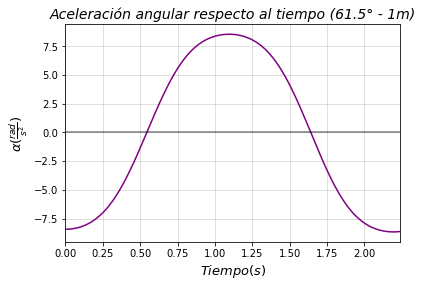

------------------ Péndulo con 73.0° - 1m ------------------
La amplitud del movimiento es de: 1.274 rad


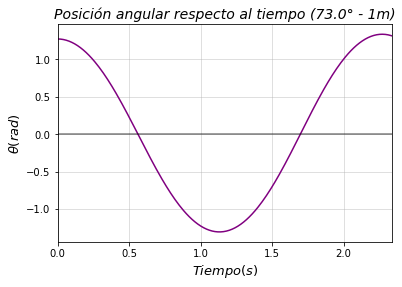

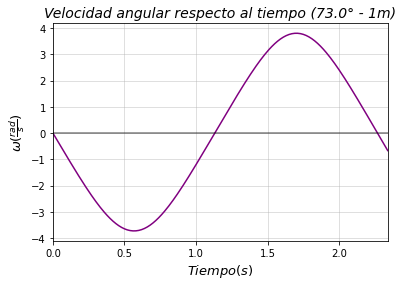

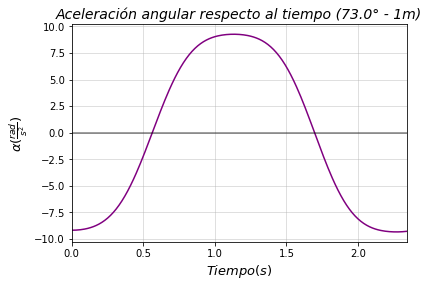

------------------ Péndulo con 61.5° - 2m ------------------
La amplitud del movimiento es de: 1.073 rad


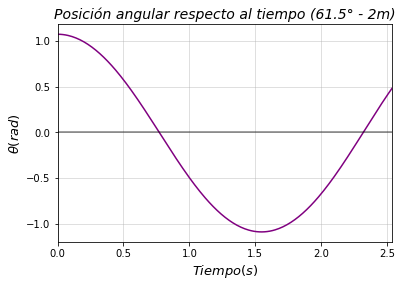

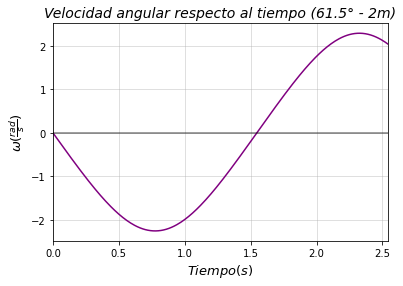

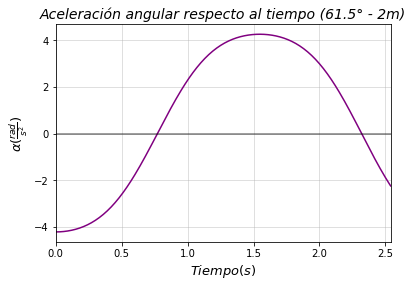

------------------ Péndulo con 73.0° - 2m ------------------
La amplitud del movimiento es de: 1.274 rad


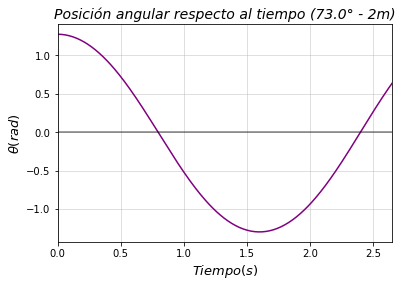

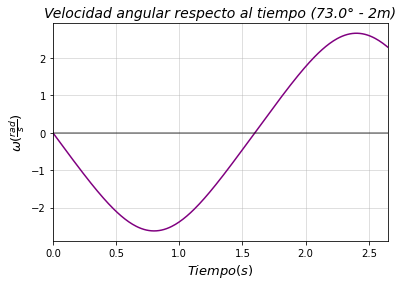

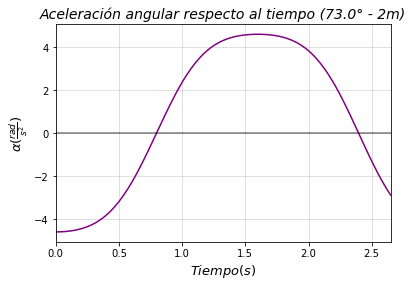

In [5]:
s61_5grad1m = simTeoGra(1, 61.5*u.deg, T1_61, g)

s73grad1m = simTeoGra(1, 73*u.deg, T1_73, g)

s61_5grad2m = simTeoGra(2, 61.5*u.deg, T2_61, g)

s73grad2m = simTeoGra(2, 73*u.deg, T2_73, g)